In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line



In [3]:
#You may find lines or sections of the following code useful:
def useful_code():
  x_low = 0
  x_high = 2*np.pi
  n_x_values = 30
  #define a set of n_x_values points between x_low and x_high (0 to
  #2 pi in this case):
  x = np.linspace(x_low,x_high,n_x_values)

  #Normalise a vector (i.e. turn it into a unit vector):
  v = np.array([4, 8, 1])
  v_hat = v/np.linalg.norm(v)
  print("Normalised vector: ", v_hat)

  #find the minimum value within vector v:
  print("Minimum of v (should be 1): ", np.min(v))
  #find where the minimum occured - NB zero indexed
  #(NB can also do argmax() for maximum point)
  print("Minimum occurs at element: ", np.argmin(v,axis=0))

  #calculate y values for the given x values, using y = cos(x)
  y = np.cos(x)
  integral = np.trapz(y, x=x) #integrate y using the trapezium rule
  print("Integral (should be approx 0):",integral)

  loc = np.pi #set location to be pi (3.14...)
  #interpolate function y(x) to find value at loc - i.e. y(loc):
  val = np.interp(loc, x, y)
  print("Value at pi (should be approx -1):",val)

  #summing and squaring:
  print("Sum of y squared: ", np.sum(y**2))

  #do a for loop
  for cnt in range(4):
    print("Iteration: ", cnt)

  #Reshape matrix A such that it has the same shape as B:
  A = np.array([[1,2],[3,4]])
  print("A before reshaping:\n",A)
  B = np.array([6,7,8,9])
  print("B:\n",B)
  A = np.reshape(A,B.shape)
  print("A after reshaping to match B:\n",A)

  #Multiply two matrices together:
  A = np.array([[1,2],[3,4]])
  B = np.array([[5,6],[7,8]])
  C = np.matmul(A, B)
  print("Multiplication of \n", A, "\nand\n", B, "\ngives:\n", C)

  #Plotting functions/points:
  fig, ax = plt.subplots()  #define a figure
  #plot the points given by vectors x and y with a blue
  #solid line ('b-'). k is black, r red and g green.
  plt.plot(x, y, 'b-')
  plt.plot(x, y, 'k.')      #as above, but plot as black dots


  #2D plotting and routines:

  #generate two random sets of values x1 and x2
  n_points = 20
  x1 = np.random.normal(loc=0,scale=1,size=n_points)
  x2 = np.random.normal(loc=0,scale=1,size=n_points)
  #Combine two vectors x1 and x2, of length n_points, into
  # a matrix of size n_points x 2
  X = np.concatenate((np.reshape(x1,[n_points,1]),
                      np.reshape(x2,[n_points,1])),axis=1)

  y = np.zeros([n_points]) #define y and set all values to zero
  #now put all the class values to 1 where the x1 value is
  # greater than 0.2
  y[x1 > 0.2] = 1

  #points in x and y:
  npx = 200
  npy = 200
  #generate the grid to sample 2D space:
  Xgrid,x1line,x2line = gen_sample_grid(npx,npy,3)
  #generate an arbitrary 2D function - here do x1^2 + x2:
  z = Xgrid[:,0]**2+Xgrid[:,1]
  #and reshape it back to the grid
  z = z.reshape([npx,npy])
  fig, ax = plt.subplots()
  #plot the values in z sampled at values given by the
  #vectors x1line, x2line:
  plt.contourf(x1line, x2line, z)
  #plot scattered values in the n_points x 2 matrix X where
  #corresponding values in the y vector equal 0:
  ax.scatter(X[y == 0, 0], X[y == 0, 1])
  #then plot where y == 1:
  ax.scatter(X[y == 1, 0], X[y == 1, 1])

#uncomment to run the code if you wish:
#useful_code()

#Q1

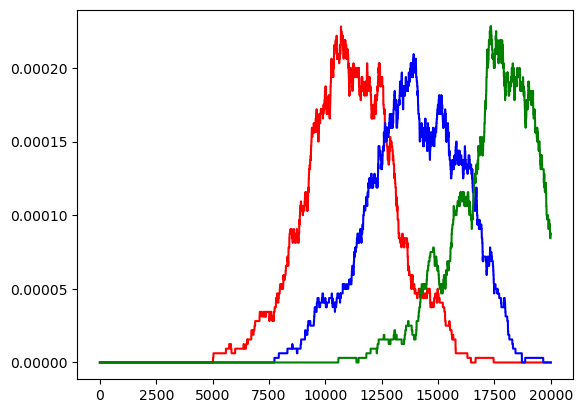

0.30612244897959184 0.44897959183673475 0.24489795918367346


In [ ]:
#Q1:

#load in the data
df = pd.read_csv("d1.csv")
a = np.array(df['a'])
b = np.array(df['b'])
c = np.array(df['c'])

n_points = a.size

## Your code here:
#(a)
# display(df)

#1a answer
xlim = 20000
xrange = np.linspace(0, xlim, xlim)
width = 800
halfwidth = width/2

def in_window(x, xi, halfwidth):
    return (xi - halfwidth < x) & (x < xi + halfwidth)

tota = np.zeros(xrange.size)
totb = np.zeros(xrange.size)
totc = np.zeros(xrange.size)

for i, x_pos in enumerate(xrange):
    tota[i] = np.sum(in_window(x_pos, a, halfwidth))
    totb[i] = np.sum(in_window(x_pos, b, halfwidth))
    totc[i] = np.sum(in_window(x_pos, c, halfwidth))

norma = tota / (n_points * width)
normb = totb / (n_points * width)
normc = totc / (n_points * width)

plt.plot(xrange, norma, color='red')
plt.plot(xrange, normb, color='blue')
plt.plot(xrange, normc, color='green')
plt.show()

#(b)
# 1b answer
dist = 15000
# wa = Factory A, wb = Factory B, wc = Factory C
# find probability of a point being from a factory given that it failed at distance dist
# = p(w | x) = posterior = px_w

pwa = 0.5
pwb = 0.2
pwc = 0.3

px_wa = np.interp(dist, xrange, norma)
px_wb = np.interp(dist, xrange, normb)
px_wc = np.interp(dist, xrange, normc)

px = pwa * px_wa + pwb * px_wb + pwc * px_wc

pwa_x = px_wa * pwa / px
pwb_x = px_wb * pwb / px
pwc_x = px_wc * pwc / px

print(pwa_x, pwb_x, pwc_x)





In [29]:
# df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d1.csv")
# a = np.array(df['a'])
# b = np.array(df['b'])
# c = np.array(df['c'])
# n_points = a.size
# ##
# halfwidth = 800/2
# n_x_vals = 20000
# x = np.linspace(0,20000,n_x_vals+1)
# tota = np.zeros(x.shape)
# totb = np.zeros(x.shape)
# totc = np.zeros(x.shape)

# def in_window(x, xp, halfwidth):
#     return 1 if xp - halfwidth < x < xp + halfwidth else 0

# for cnt in range(n_points):
#     for pos in range(n_x_vals):
#         # if x[pos] > a[cnt] - halfwidth and x[pos] < a[cnt] + halfwidth:
#         #     tota[pos] = tota[pos] + 1
#         # if x[pos] > b[cnt] - halfwidth and x[pos] < b[cnt] + halfwidth:
#         #     totb[pos] = totb[pos] + 1
#         # if c[cnt] - halfwidth < x[pos] < c[cnt] + halfwidth:
#         #     totc[pos] = totc[pos] + 1
#         tota[pos] += in_window(a[cnt], x[pos], halfwidth)
#         totb[pos] += in_window(b[cnt], x[pos], halfwidth)
#         totc[pos] += in_window(c[cnt], x[pos], halfwidth)

# print(sum(tota), sum(totb), sum(totc))
# # pa = tota/n_points/(halfwidth*2)
# # pb = totb/n_points/(halfwidth*2)
# # pc = totc/n_points/(halfwidth*2)

320000.0 318400.0 263265.0


#Q2
(a)
The sound since they all sound the same so no difference in metric between them
(b)
Property is called reflexivity

#Q3

(1, 2) (2, 300)
(1, 300) (1, 300)


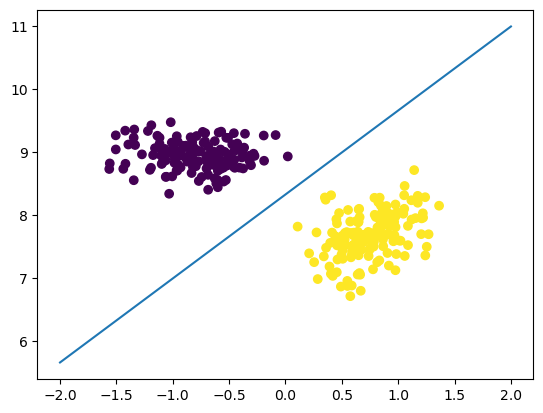

In [78]:
#Q3:

w = np.array([0.8, -0.6])
w0 = 5

df = pd.read_csv("d3.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = x1.size

#Your code here...

plt.scatter(x1, x2, c=y)

xrange = np.linspace(-2, 2, n_points)
w = np.array([0.8, -0.6])
w0 = 5
# 0.8x1 - 0.6x2 + 5 = 0
# x2 = (0.8x1 + 5) / 0.6
boundary = (w[0] * xrange + 5) / -w[1]
plt.plot(xrange, boundary)

# margin defined as min(yi(wTxi + w0))
w = w.reshape(2, 1)
xi = np.array([x1, x2])
# print(xi.shape, w.shape)
gi = np.matmul(w.T, xi) + w0
print(w.T.shape, xi.shape)
yi = np.array([y])
# print(yi.shape)

margin = yi * gi
print(yi.shape, gi.shape)
# print(margin.shape)
# print(np.min(margin))



(300, 1) (300, 1)
(300, 1)


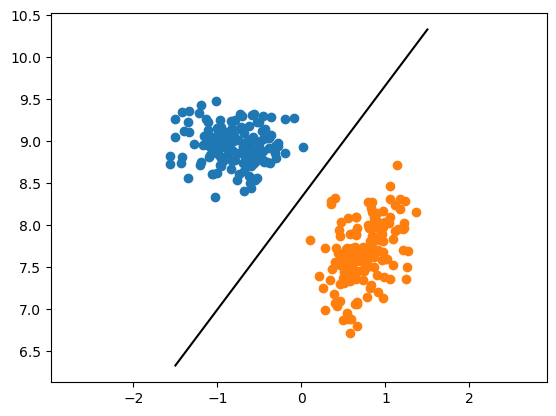

In [73]:
w = np.array([0.8, -0.6])
w0 = 5
df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d3.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])
n_points = x1.size
fig, ax = plt.subplots()
ax.scatter(x1[y == -1], x2[y == -1])
ax.scatter(x1[y == 1], x2[y == 1])
5
x1s = np.linspace(-1.5,1.5,200)
x2s = (-w0-w[0]*x1s)/w[1]
ax.plot(x1s,x2s,'k-')
ax.axis('equal')
w = np.reshape(w,[2,1])
X = np.concatenate((np.reshape(x1,[n_points,1]),np.reshape(x2,[n_points,1])),axis=1) ###
g = np.matmul(w.T,X.T).T+w0
# print(g.shape)
# print(g)
y = np.reshape(y,g.shape)
marg = y*g
print(y.shape, g.shape)
print(marg.shape)

#Q4
Using the RBF kernel reduces bias (how well the model fits to the dataset when training). However with the added complexity, there is a possibility of increased overfitting leading to increased variance (how well the model fits to unseen data). Therefore it is hard to predict whether the use of the RBF kernel will improve or reduce the model's accuracy in practice.


#Q5

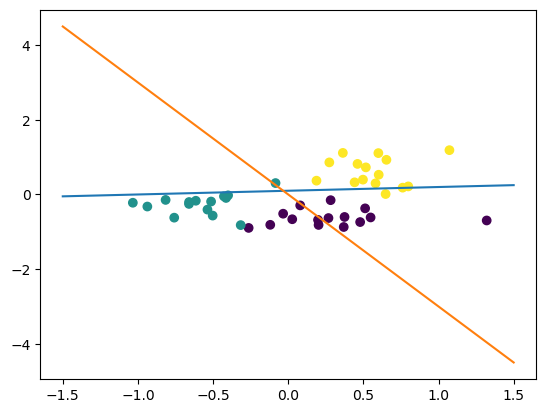

In [83]:
#Q5

df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d5.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = y.size

#Your code here...

plt.scatter(x1, x2, c=y)

xrange = np.linspace(-1.5, 1.5, n_points)
w0 = np.array([0.1, -1])
w00 = 0.1
w1 = np.array([-4, 0.5])
w01 = 0.5
w2 = np.array([0.3, 0.1])
w02 = 0
# 0.8x1 - 0.6x2 + 5 = 0
# x2 = (0.8x1 + 5) / 0.6
boundary0 = (w0[0] * xrange + w00) / -w0[1]
boundary1 = (w1[0] * xrange + w01) / -w1[1]
boundary2 = (w2[0] * xrange + w02) / -w2[1]
plt.plot(xrange, boundary0)
plt.plot(xrange, boundary1)
plt.plot(xrange, boundary2)


(2, 45)


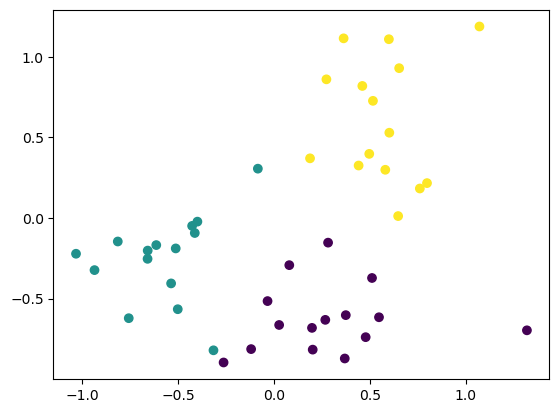

In [16]:
df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d5.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = y.size

#Your code here...

# 5 answer
plt.scatter(x1, x2, c=y)

xrange = np.linspace(-1.5, 1.5, n_points)
w0 = np.array([0.1, -1])
w00 = 0.1
w1 = np.array([-4, 0.5])
w01 = 0.5
w2 = np.array([0.3, 0.1])
w02 = 0

xi = np.array([x1, x2])
print(xi.shape)
g0 = np.matmul(w0.T, xi) + w00
g1 = np.matmul(w1.T, xi) + w01
g2 = np.matmul(w2.T, xi) + w02

y_pred = []
for i in range(n_points):
    if g0[i] > g1[i] and g0[i] > g2[i]:
        y_pred.append(0)
    elif g1[i] > g0[i] and g1[i] > g2[i]:
        y_pred.append(1)
    else:
        y_pred.append(2)

wrong = []
for i, (real, pred) in enumerate(zip(y, y_pred)):
    if real != pred:
        wrong.append(i)

# plt.scatter(x1[wrong], x2[wrong], c='red')


#Q6

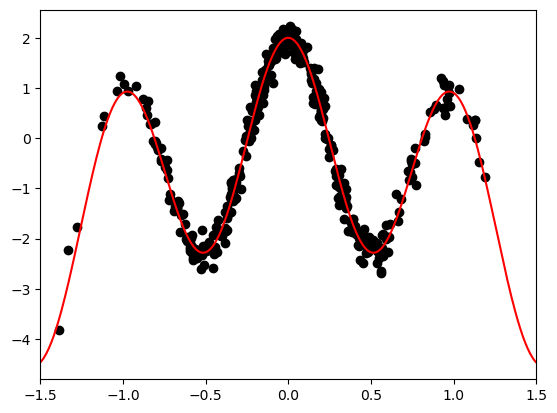

In [35]:
df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d6.csv")
x = np.array(df['x'])
y = np.array(df['y'])

n_points = y.size

#Your code here...

# plt.scatter(x, y, c="black")
# plt.xlim(-1.5, 1.5)

A = -2
B = 0
C = 2.5
steps = 40
step_size = 0.0005
def f(xi):
    return A * (xi ** 2) + B * np.cos(C * xi * np.pi)

A_history = []
B_history = []
C_history = []
for _ in range(steps):
    residual = f(x) - y
    E2 = np.sum(residual ** 2)
    # print(E2)
    A_history.append(A)
    B_history.append(B)
    C_history.append(C)
    dE2dA = np.sum(2 * residual * (x ** 2))
    dE2dB = np.sum(2 * residual * np.cos(C * x * np.pi))
    dE2dC = np.sum(2 * residual * -B * x * np.pi * np.sin(C * x * np.pi))

    A -= step_size * dE2dA
    B -= step_size * dE2dB
    C -= step_size * dE2dC

xrange = np.linspace(-1.5, 1.5, n_points)
fig, ax = plt.subplots()
ax.scatter(x, y, c="black")
ax.set_xlim(-1.5, 1.5)
ax.plot(xrange, f(xrange), c="red")



#Q7

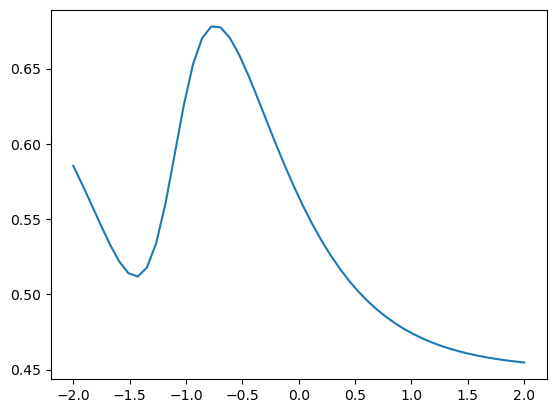

In [40]:
# 7 answer
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-2, 2, 50)
zvals = []

# for x in xrange:
#   y1 = (6 * x) + 6.5
#   y1 = sigmoid(y1)

#   y2 = (1.7 * x) + 1.7
#   y2 = sigmoid(y2)

#   z = (2 * y1) - (3 * y2) + 0.8
#   z = sigmoid(z)
#   zvals.append(z)

y1 = (6 * x) + 6.5
y1 = sigmoid(y1)

y2 = (1.7 * x) + 1.7
y2 = sigmoid(y2)

z = (2 * y1) - (3 * y2) + 0.8
z = sigmoid(z)
# zvals.append(z)

fig, ax = plt.subplots()
ax.plot(xrange, z)
#Your code here...
